In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score,confusion_matrix

import pandas as pd
import numpy as np

In [14]:
iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y=pd.DataFrame(iris.target)
Y.columns=['targets']


In [15]:
model=KMeans(n_clusters=3)
labels_=model.fit(X)
plt.figure(figsize=(14,7))
colormap=np.array(['red','blue','orange'])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1400x700 with 0 Axes>

Text(0, 0.5, 'Petal Width')

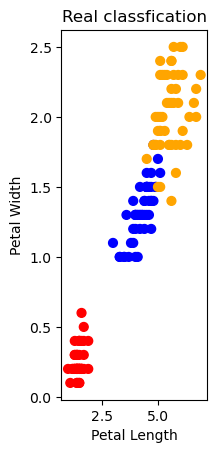

In [16]:
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.targets],s=40)
plt.title('Real classfication')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

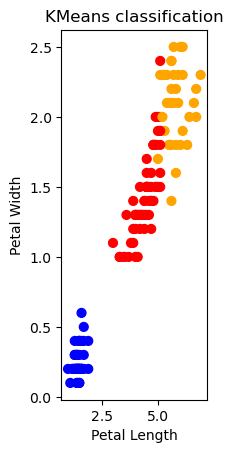

In [17]:
plt.subplot(1,3,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('KMeans classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [18]:
print('The accuracy score of KMeans:',accuracy_score(Y,model.labels_))
print('The confusion matrix of KMeans:',confusion_matrix(Y,model.labels_))

The accuracy score of KMeans: 0.24
The confusion matrix of KMeans: [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [19]:
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

In [20]:

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm=gmm.predict(xs)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Petal Width')

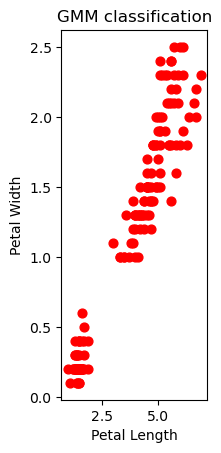

In [23]:
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[0],s=40)
plt.title('GMM classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


In [25]:
print('The accuracy score of EM:',accuracy_score(Y,y_gmm))
print('The confusion matrix of EM:',confusion_matrix(Y,y_gmm))

The accuracy score of EM: 0.0
The confusion matrix of EM: [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]
